<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="../../figures/PDSH-cover-small.png">

*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*

<!--NAVIGATION-->
< [Geographic Data with Basemap](04.13-Geographic-Data-With-Basemap.ipynb) | [Contents](Index.ipynb) | [Further Resources](04.15-Further-Resources.ipynb) >

<a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.14-Visualization-With-Seaborn.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


# Visualization with Seaborn

Matplotlib has proven to be an incredibly useful and popular visualization tool, but even avid users will admit it often leaves much to be desired.
There are several valid complaints about Matplotlib that often come up:

- Prior to version 2.0, Matplotlib's defaults are not exactly the best choices. It was based off of MATLAB circa 1999, and this often shows.
- Matplotlib's API is relatively low level. Doing sophisticated statistical visualization is possible, but often requires a *lot* of boilerplate code.
- Matplotlib predated Pandas by more than a decade, and thus is not designed for use with Pandas ``DataFrame``s. In order to visualize data from a Pandas ``DataFrame``, you must extract each ``Series`` and often concatenate them together into the right format. It would be nicer to have a plotting library that can intelligently use the ``DataFrame`` labels in a plot.

An answer to these problems is [Seaborn](http://seaborn.pydata.org/). Seaborn provides an API on top of Matplotlib that offers sane choices for plot style and color defaults, defines simple high-level functions for common statistical plot types, and integrates with the functionality provided by Pandas ``DataFrame``s.

To be fair, the Matplotlib team is addressing this: it has recently added the ``plt.style`` tools discussed in [Customizing Matplotlib: Configurations and Style Sheets](04.11-Settings-and-Stylesheets.ipynb), and is starting to handle Pandas data more seamlessly.
The 2.0 release of the library will include a new default stylesheet that will improve on the current status quo.
But for all the reasons just discussed, Seaborn remains an extremely useful addon.

## Seaborn Versus Matplotlib

Here is an example of a simple random-walk plot in Matplotlib, using its classic plot formatting and colors.
We start with the typical imports:

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

Now we create some random walk data:

In [2]:
# Create some data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

And do a simple plot:

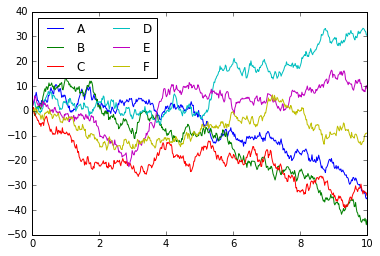

In [3]:
# Plot the data with Matplotlib defaults
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

Although the result contains all the information we'd like it to convey, it does so in a way that is not all that aesthetically pleasing, and even looks a bit old-fashioned in the context of 21st-century data visualization.

Now let's take a look at how it works with Seaborn.
As we will see, Seaborn has many of its own high-level plotting routines, but it can also overwrite Matplotlib's default parameters and in turn get even simple Matplotlib scripts to produce vastly superior output.
We can set the style by calling Seaborn's ``set()`` method.
By convention, Seaborn is imported as ``sns``:

In [4]:
!pip install seaborn

In [5]:
import seaborn as sns
sns.set()

Now let's rerun the same two lines as before:

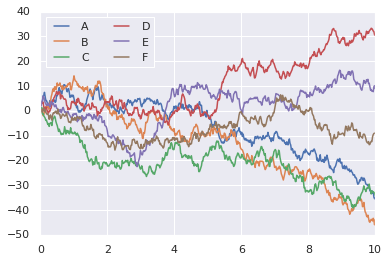

In [6]:
# same plotting code as above!
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

### The magic is below the surface!

The code still uses `plt` but the background has changed (to being gridded) and shaded in a pleasing color.

## Exploring Seaborn Plots

The main idea of Seaborn is that it provides high-level commands to create a variety of plot types useful for statistical data exploration, and even some statistical model fitting.

Let's take a look at a few of the datasets and plot types available in Seaborn. Note that all of the following *could* be done using raw Matplotlib commands (this is, in fact, what Seaborn does under the hood) but the Seaborn API is much more convenient.

### Histograms, KDE, and densities

Often in statistical data visualization, all you want is to plot histograms and joint distributions of variables.
We have seen that this is relatively straightforward in Matplotlib:

In [7]:
data = np.random.multivariate_normal([0, 0], [[50, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=range(2))
data

,0,1
0,11.198715,0.629284
1,-3.838131,0.200353
2,1.781020,0.533275
3,1.296720,-0.085625
4,-6.420228,0.009990
...,...,...
1995,-0.774936,-0.778309
1996,0.780293,0.211625
1997,-6.430757,-1.398346
1998,4.596745,0.524078


In [8]:
data_widemat = np.array([[50,-2],[-2,1]])

print (np.linalg.eigvals(data_widemat))
pd.DataFrame(data_widemat)

[50.08149711  0.91850289]


,0,1
0,50,-2
1,-2,1


This covariance matrix $\left( \begin{array}{cc} 
50 & -2\\
-2 & 1
\end{array}\right)
$ indicates the level to which two variables vary together.


From the multivariate normal distribution, we draw N-dimensional
samples, $ X = [x_1, x_2]. $  The covariance matrix element $ C_{ij} $ is the covariance of $ x_i $ and $x_j$.
The element $C_{ii}$ is the variance of $x_i$ (i.e. its "spread").
The negative covariances in the off-diagonal elements of the matrix indicate that the two columns are _inversely_ correlated.

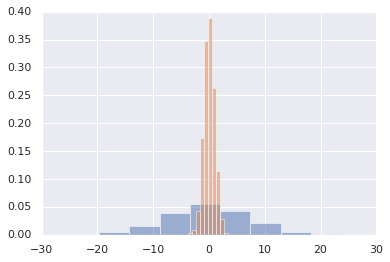

In [9]:
data = np.random.multivariate_normal([0, 0], data_widemat, size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5)

### Smoothed Histograms

Rather than a histogram, we can get a smooth estimate of the distribution using a _kernel density estimation_.

The concept of kernel density estimation is illustrated below. The histogram (left) and kernel density estimate (right) constructed using the same data. The six individual kernels are the red dashed curves, the kernel density estimate the blue curves. The data points are the rug plot on the horizontal axis. Source, [Wikipedia](https://en.wikipedia.org/wiki/Kernel_density_estimation).

![](https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Comparison_of_1D_histogram_and_KDE.png/500px-Comparison_of_1D_histogram_and_KDE.png)

Seaborn shows kernel density estimates does with `sns.kdeplot`.

In [10]:
np.array(data)

array([[  0.97641762,   1.57602332],
       [  1.2123751 ,   0.89765718],
       [-11.16702119,   0.90879233],
       ...,
       [-14.71370626,  -0.49801098],
       [-15.87364785,   1.66645787],
       [ -8.37696024,   1.49690985]])

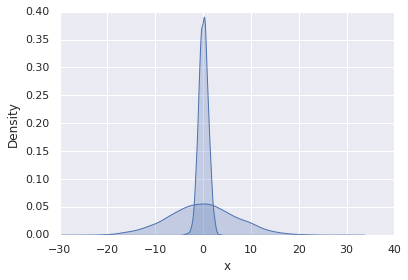

In [11]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

Histograms and KDE can be combined using ``distplot``:

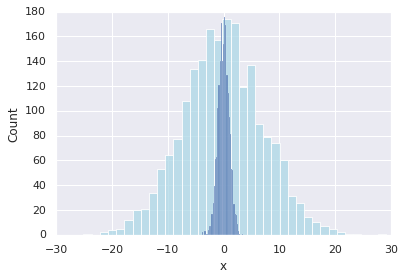

In [12]:
sns.histplot(data['x'], color='lightblue')
sns.histplot(data['y']);

If we pass the full two-dimensional dataset to ``kdeplot``, we will get a two-dimensional visualization of the data:

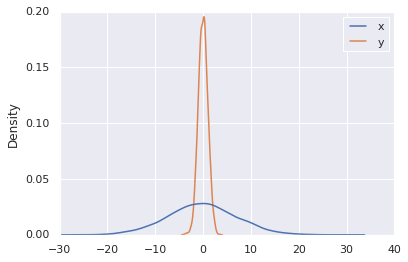

In [13]:
import numpy as np
sns.kdeplot(data=data)

We can see the joint distribution and the marginal distributions together using ``sns.jointplot``.
For this plot, we'll set the style to a white background:

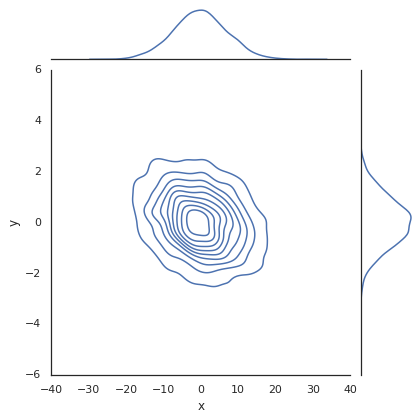

In [14]:
with sns.axes_style('white'):
    sns.jointplot(x = "x", y = "y", data = data, kind='kde');

There are other parameters that can be passed to ``jointplot``—for example, we can use a hexagonally based histogram instead:

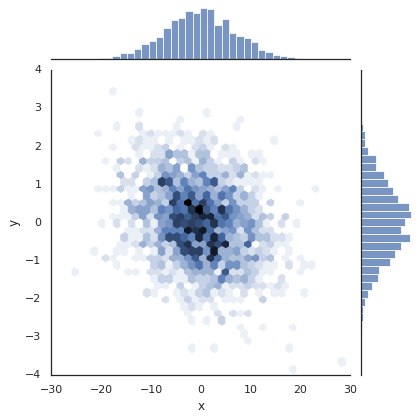

In [15]:
with sns.axes_style('white'):
    sns.jointplot(x="x", y="y", data=data, kind='hex')

### Faceted histograms

Sometimes the best way to view data is via histograms of subsets. Seaborn's ``FacetGrid`` makes this extremely simple.
We'll take a look at some data that shows the amount that restaurant staff receive in tips based on various indicator data:

In [16]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


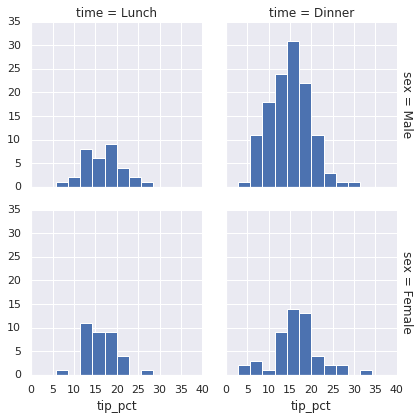

In [17]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

### Factor plots

Factor plots can be useful for this kind of visualization as well. This allows you to view the distribution of a parameter within bins defined by any other parameter:

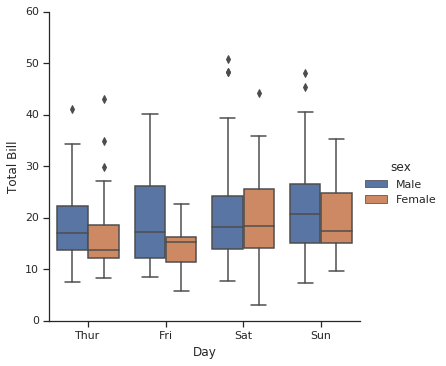

In [18]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="day", y="total_bill", hue="sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

### Joint distributions

Similar to the pairplot we saw earlier, we can use ``sns.jointplot`` to show the joint distribution between different datasets, along with the associated marginal distributions:

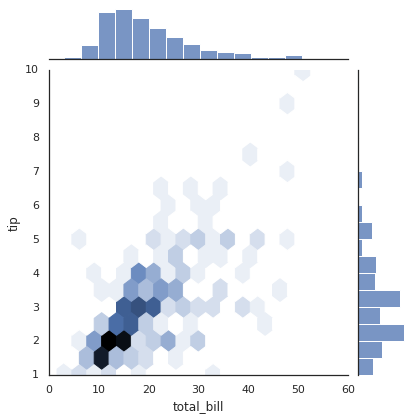

In [19]:
with sns.axes_style('white'):
    sns.jointplot(x="total_bill", y="tip", data=tips, kind='hex')

The joint plot can even do some automatic kernel density estimation and regression:

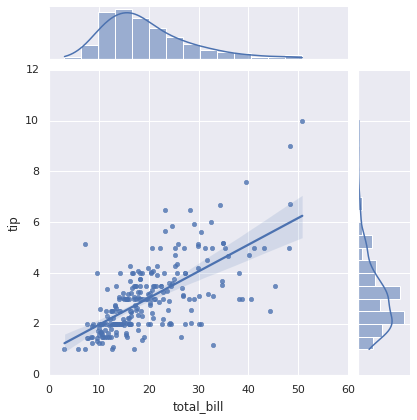

In [20]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind='reg');

### Bar plots

Time series can be plotted using ``sns.factorplot``. In the following example, we'll use the Planets 
Planets dataset, available via the [Seaborn package](http://seaborn.pydata.org/). This dataset has been excerpted from the [NASA Exoplanet Archive](https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=PS). The excerpt has 1,035 rows but many more exoplanets have been found since and the current count in 2020 is 26,853!

It gives information on planets that astronomers have discovered around other stars (known as *extrasolar planets* or *exoplanets* for short). It can be downloaded with a simple Seaborn command, `load_dataset('planets')`

In [21]:
planets = sns.load_dataset('planets')
print(planets.shape)
planets

(1035, 6)


,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


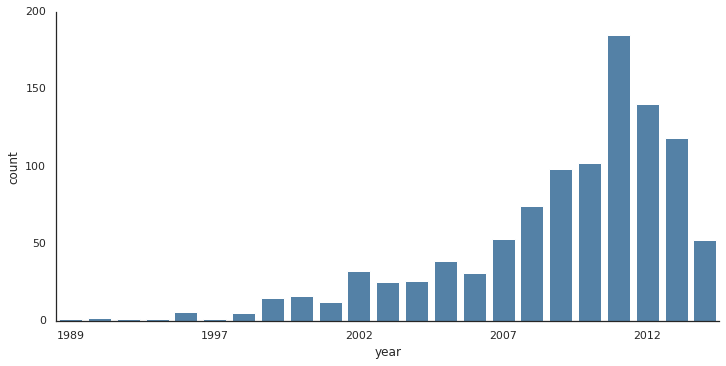

In [22]:
with sns.axes_style('white'):
    g = sns.catplot(x="year", data=planets, aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=5)

We can learn more by looking at the *method* of discovery of each of these planets:

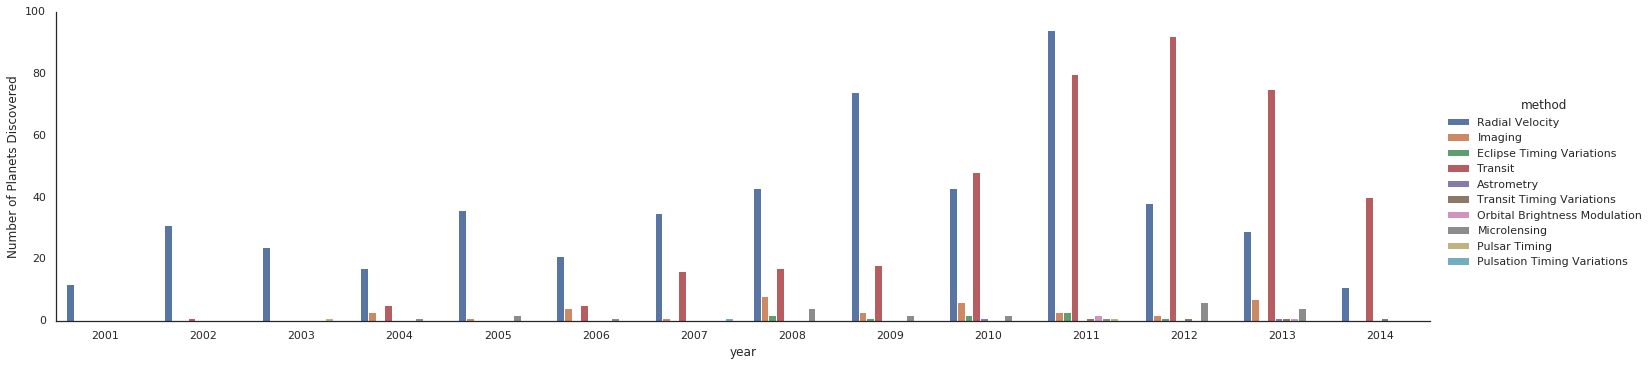

In [23]:
with sns.axes_style('white'):
    g = sns.catplot(x="year", data=planets, aspect=4.0, kind='count',
                       hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')

For more information on plotting with Seaborn, see the [Seaborn documentation](http://seaborn.pydata.org/), a [tutorial](http://seaborn.pydata.org/tutorial.htm), and the [Seaborn gallery](http://seaborn.pydata.org/examples/index.html).

<!--NAVIGATION-->
< [Geographic Data with Basemap](04.13-Geographic-Data-With-Basemap.ipynb) | [Contents](Index.ipynb) | [Further Resources](04.15-Further-Resources.ipynb) >

<a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.14-Visualization-With-Seaborn.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
